In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from arch.univariate import GARCH, ConstantMean, SkewStudent, Normal
from arch import arch_model
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from scipy.stats import norm
import seaborn as sns

In [2]:
# Configuración general de gráficos
sns.set_style("white")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [3]:
def seed_dist(i):
    return [i,i+1,i+2,i+3]

In [4]:
#simula y estima los parametros
def sim_and_stim(n,m,alpha,beta,omega):
    #n número de trayectorias
    #m número de datos en la trayectoria
    sim_mod = arch_model(None, p=1, o=0, q=1)
    params = {"mu":0,"omega": omega,"alpha[1]":alpha,"beta[1]":beta}
    param = pd.Series(params)
    np.random.seed(69)
    datos_simulados = []
    #simulación de las n trayectorias
    for i in range(n):
        seedd = seed_dist(i)
        rs = np.random.RandomState(seedd)
        sim_mod.distribution = Normal(seed=rs)
        sim_data = sim_mod.simulate(param, m)
        datos_simulados.append(sim_data["data"])
    columns = ["mu","omega","alpha1","beta1"]
    parametros = pd.DataFrame(columns=columns)
    #Estimación
    for i in range(n):
        modelo = arch_model(datos_simulados[i], p=1, o=0, q=1)
        res = modelo.fit(disp="off")
        new_row = pd.DataFrame([res.params.values], columns=columns)
        parametros = pd.concat([parametros,new_row], axis=0)
    return parametros
        
        
        
        
        
        
        
        
        
        
        

## Fijeremos en numero de datos en m = 1000 y se ira cambiando el valor de n de 100 a 10000

In [23]:
#parametros
alpha = [0.2,0.8,0.4]
beta = [0.3,0.1,0.4]
omega = [0.1,0.6,0.8]

#trayectoria(n) y cantidad de datos(m)
n =100
m =1000


In [24]:
param1 = []
for i in range(len(alpha)):
    result = sim_and_stim(n,m,alpha[i],beta[i],omega[i])
    param1.append(result)

In [25]:
n = 1000
param2 = []
for i in range(len(alpha)):
    result = sim_and_stim(n,m,alpha[i],beta[i],omega[i])
    param2.append(result)

In [26]:
n = 5000
param3 = []
for i in range(len(alpha)):
    result = sim_and_stim(n,m,alpha[i],beta[i],omega[i])
    param3.append(result)

# "Estandarizado"

In [27]:
for i in range(len(alpha)):
    param1[i]["alpha1"] = (param1[i]["alpha1"]-alpha[i])/(np.std(param1[i]["alpha1"]))
    param1[i]["beta1"] = (param1[i]["beta1"]-beta[i])/(np.std(param1[i]["beta1"]))
    param1[i]["omega"] = (param1[i]["omega"]-omega[i])/(np.std(param1[i]["omega"]))

In [28]:
for i in range(len(alpha)):
    param2[i]["alpha1"] = (param2[i]["alpha1"]-alpha[i])/(np.std(param2[i]["alpha1"]))
    param2[i]["beta1"] = (param2[i]["beta1"]-beta[i])/(np.std(param2[i]["beta1"]))
    param2[i]["omega"] = (param2[i]["omega"]-omega[i])/(np.std(param2[i]["omega"]))

In [29]:
for i in range(len(alpha)):
    param3[i]["alpha1"] = (param3[i]["alpha1"]-alpha[i])/(np.std(param3[i]["alpha1"]))
    param3[i]["beta1"] = (param3[i]["beta1"]-beta[i])/(np.std(param3[i]["beta1"]))
    param3[i]["omega"] = (param3[i]["omega"]-omega[i])/(np.std(param3[i]["omega"]))

In [39]:
f_normal = lambda x : np.exp(-(x)**2/2)/np.sqrt(2*np.pi*1)
x = np.linspace(-4,4,1000)
f_eval = f_normal(x)

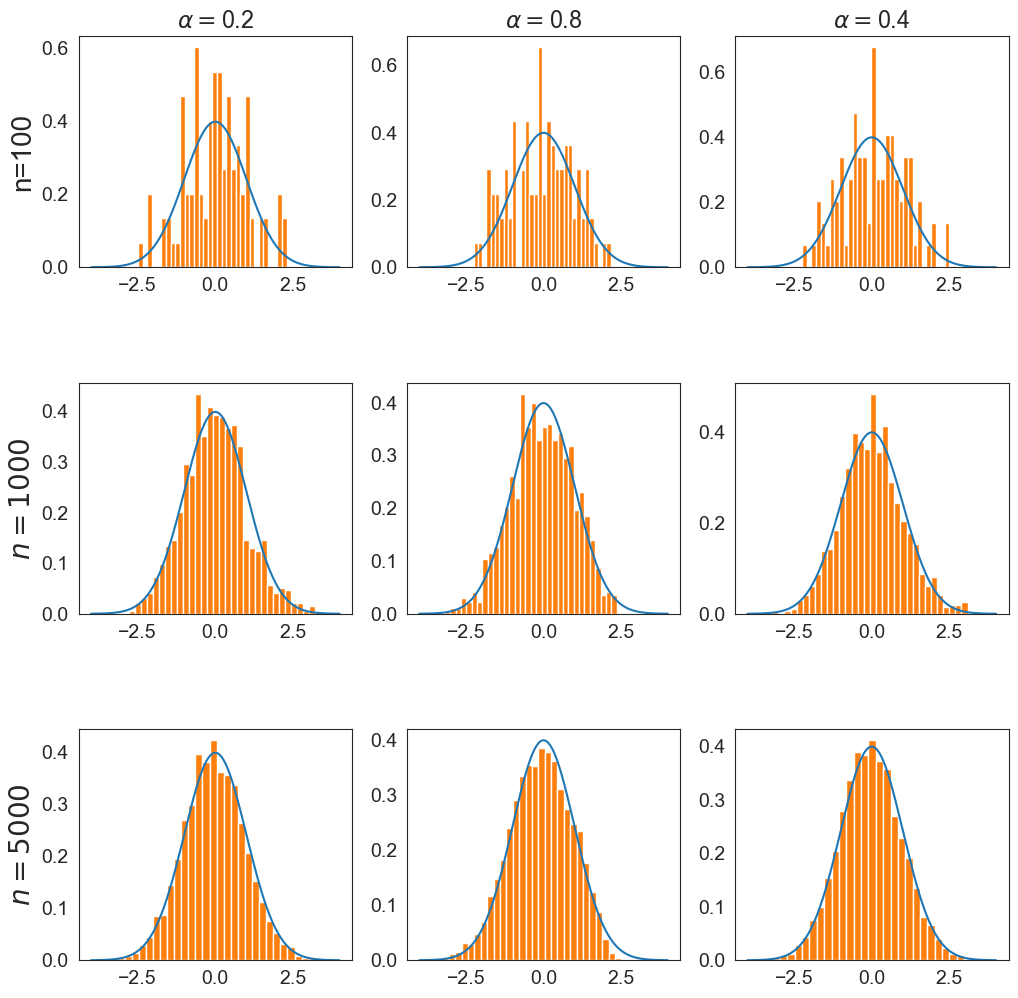

In [40]:
fig, axes = plt.subplots(3,3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)
for i in range(3):
    for j in range(len(alpha)):
        axes[i,j].plot(x,f_eval)
        if i==0:
            axes[i,j].hist(param1[j]["alpha1"],density=True,bins=32)
            axes[i, j].set_title(fr'$\alpha=${alpha[j]}')
            if j==0:
                axes[i, j].set_ylabel(fr'n=100', fontsize=20)
        elif i==1:
            axes[i,j].hist(param2[j]["alpha1"],density=True,bins=32)
            if j==0:
                axes[i, j].set_ylabel(fr'$n=1000$', fontsize=20)
        else:
            axes[i,j].hist(param3[j]["alpha1"],density=True,bins=32)
            if j==0:
                axes[i, j].set_ylabel(fr'$n=5000$', fontsize=20)
            

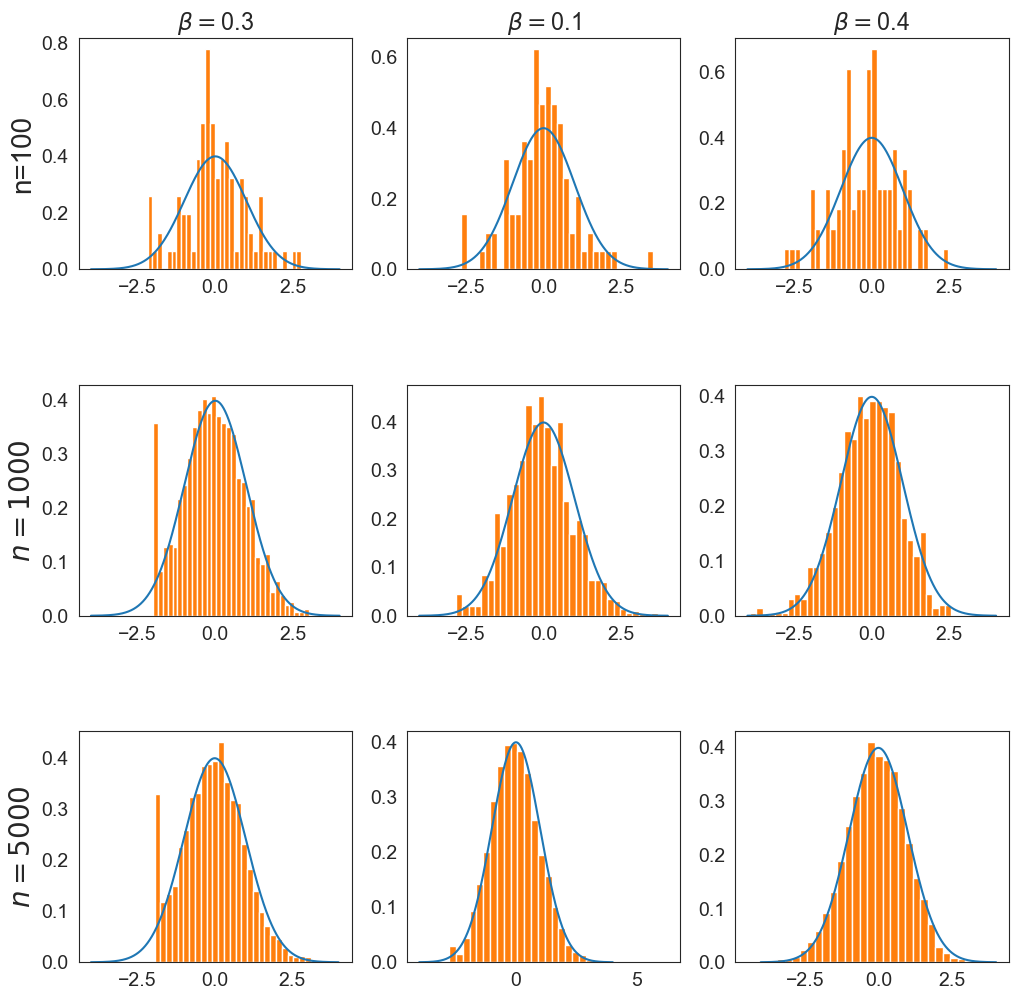

In [41]:
fig, axes = plt.subplots(3,3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)
for i in range(3):
    for j in range(len(alpha)):
        axes[i,j].plot(x,f_eval)
        if i==0:
            axes[i,j].hist(param1[j]["beta1"],density=True,bins=32)
            axes[i, j].set_title(fr'$\beta=${beta[j]}')
            if j==0:
                axes[i, j].set_ylabel(fr'n=100', fontsize=20)
        elif i==1:
            axes[i,j].hist(param2[j]["beta1"],density=True,bins=32)
            if j==0:
                axes[i, j].set_ylabel(fr'$n=1000$', fontsize=20)
        else:
            axes[i,j].hist(param3[j]["beta1"],density=True,bins=32)
            if j==0:
                axes[i, j].set_ylabel(fr'$n=5000$', fontsize=20)

In [47]:
min(param1[0]["beta1"])

-2.1769768006593937

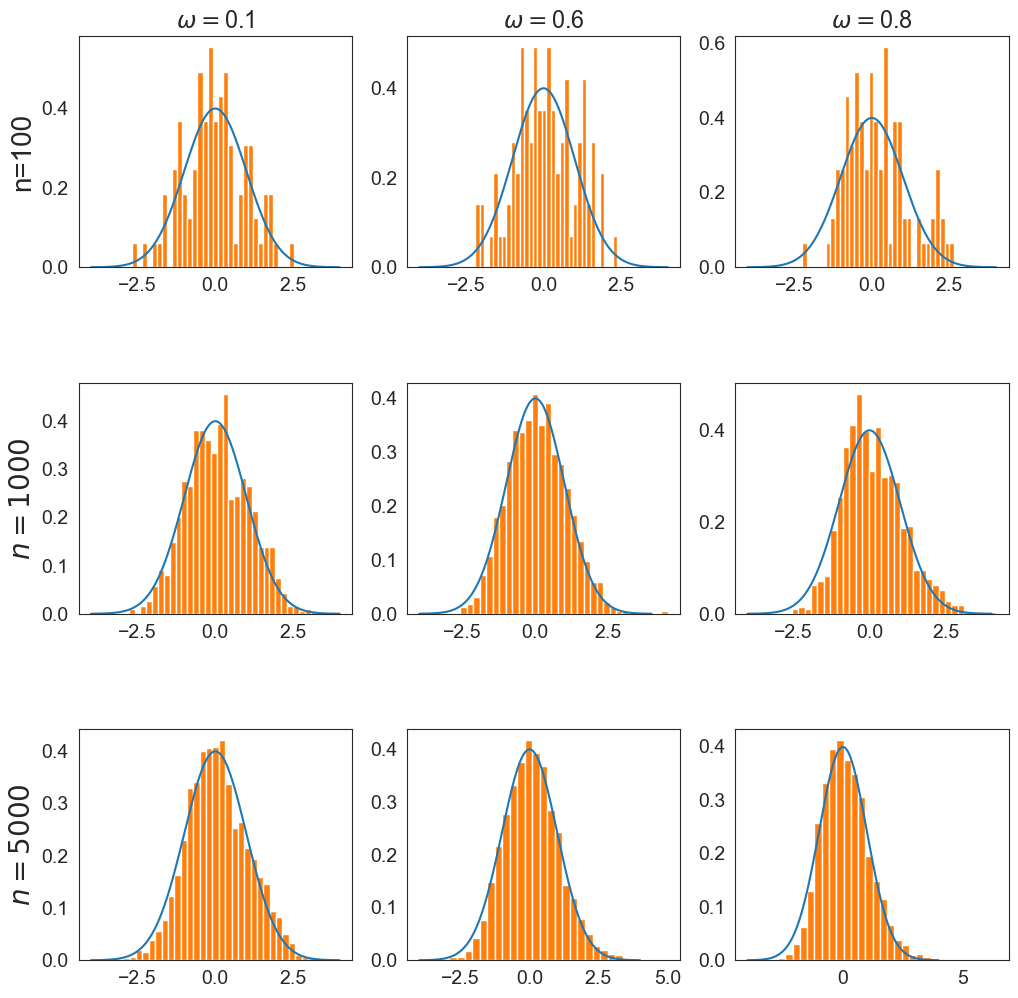

In [42]:
fig, axes = plt.subplots(3,3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)
for i in range(3):
    for j in range(len(alpha)):
        axes[i,j].plot(x,f_eval)
        if i==0:
            axes[i,j].hist(param1[j]["omega"],density=True,bins=32)
            axes[i, j].set_title(fr'$\omega=${omega[j]}')
            if j==0:
                axes[i, j].set_ylabel(fr'n=100', fontsize=20)
        elif i==1:
            axes[i,j].hist(param2[j]["omega"],density=True,bins=32)
            if j==0:
                axes[i, j].set_ylabel(fr'$n=1000$', fontsize=20)
        else:
            axes[i,j].hist(param3[j]["omega"],density=True,bins=32)
            if j==0:
                axes[i, j].set_ylabel(fr'$n=5000$', fontsize=20)

# n variando y m=1000

In [11]:
#parametros
alpha = [0.2,0.05,0.8,0.4]
beta = [0.3,0.8,0.05,0.4]
omega = [0.1,0.3,0.6,0.8]

#trayectoria(n) y cantidad de datos(m)
n = 100
m = 1000


In [15]:
param1 = []
for i in range(len(alpha)):
    result = sim_and_stim(n,m,alpha[i],beta[i],omega[i])
    param1.append(result)
n = 1000
param2 = []
for i in range(len(alpha)):
    result = sim_and_stim(n,m,alpha[i],beta[i],omega[i])
    param2.append(result)
n = 10000
param3 = []
for i in range(len(alpha)):
    result = sim_and_stim(n,m,alpha[i],beta[i],omega[i])
    param3.append(result)


In [16]:
for i in range(len(alpha)):
    param1[i]["alpha1"] = (param1[i]["alpha1"]-alpha[i])/(np.std(param1[i]["alpha1"]))
    param1[i]["beta1"] = (param1[i]["beta1"]-beta[i])/(np.std(param1[i]["beta1"]))
    param1[i]["omega"] = (param1[i]["omega"]-omega[i])/(np.std(param1[i]["omega"]))
for i in range(len(alpha)):
    param2[i]["alpha1"] = (param2[i]["alpha1"]-alpha[i])/(np.std(param2[i]["alpha1"]))
    param2[i]["beta1"] = (param2[i]["beta1"]-beta[i])/(np.std(param2[i]["beta1"]))
    param2[i]["omega"] = (param2[i]["omega"]-omega[i])/(np.std(param2[i]["omega"]))
for i in range(len(alpha)):
    param3[i]["alpha1"] = (param3[i]["alpha1"]-alpha[i])/(np.std(param3[i]["alpha1"]))
    param3[i]["beta1"] = (param3[i]["beta1"]-beta[i])/(np.std(param3[i]["beta1"]))
    param3[i]["omega"] = (param3[i]["omega"]-omega[i])/(np.std(param3[i]["omega"]))

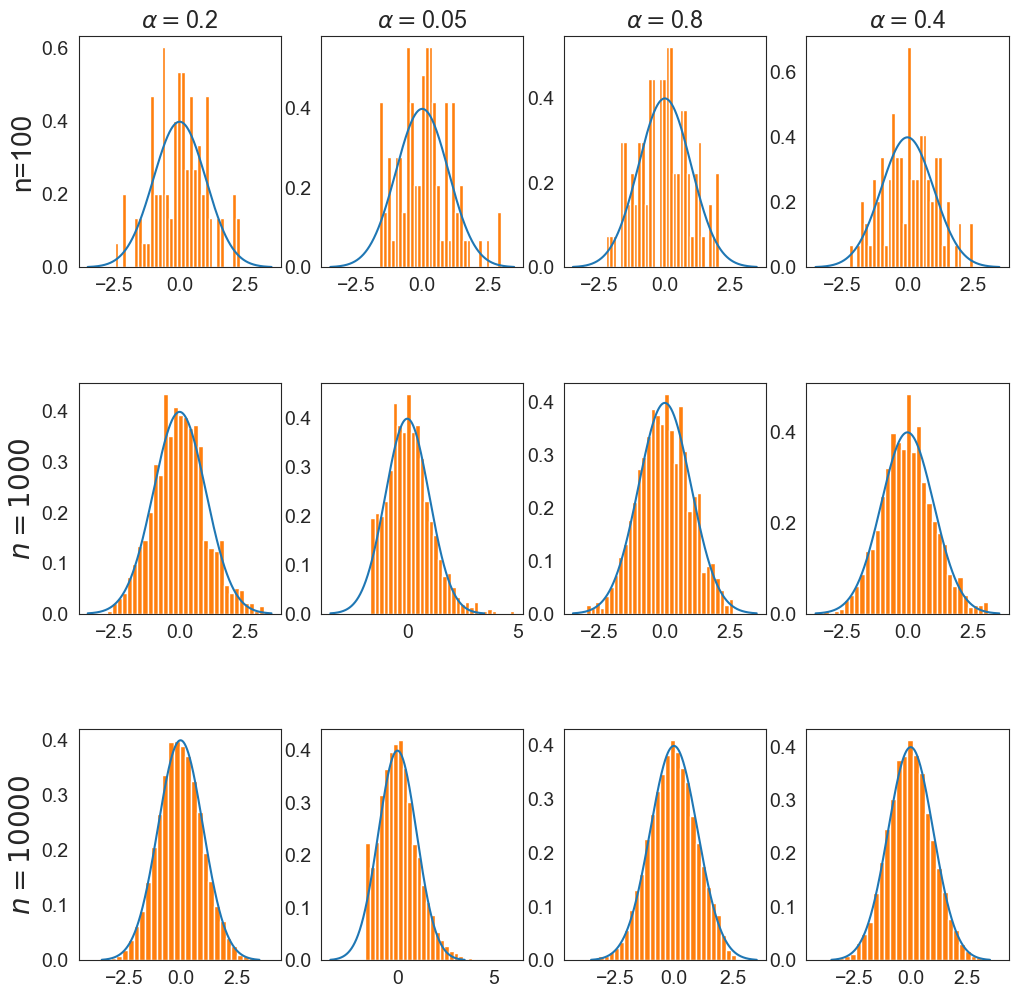

In [21]:
fig, axes = plt.subplots(3,4, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)
for i in range(3):
    for j in range(len(alpha)):
        axes[i,j].plot(x,f_eval)
        if i==0:
            axes[i,j].hist(param1[j]["alpha1"],density=True,bins=32)
            axes[i, j].set_title(fr'$\alpha=${alpha[j]}')
            if j==0:
                axes[i, j].set_ylabel(fr'n=100', fontsize=20)
        elif i==1:
            axes[i,j].hist(param2[j]["alpha1"],density=True,bins=32)
            if j==0:
                axes[i, j].set_ylabel(fr'$n=1000$', fontsize=20)
        else:
            axes[i,j].hist(param3[j]["alpha1"],density=True,bins=32)
            if j==0:
                axes[i, j].set_ylabel(fr'$n=10000$', fontsize=20)

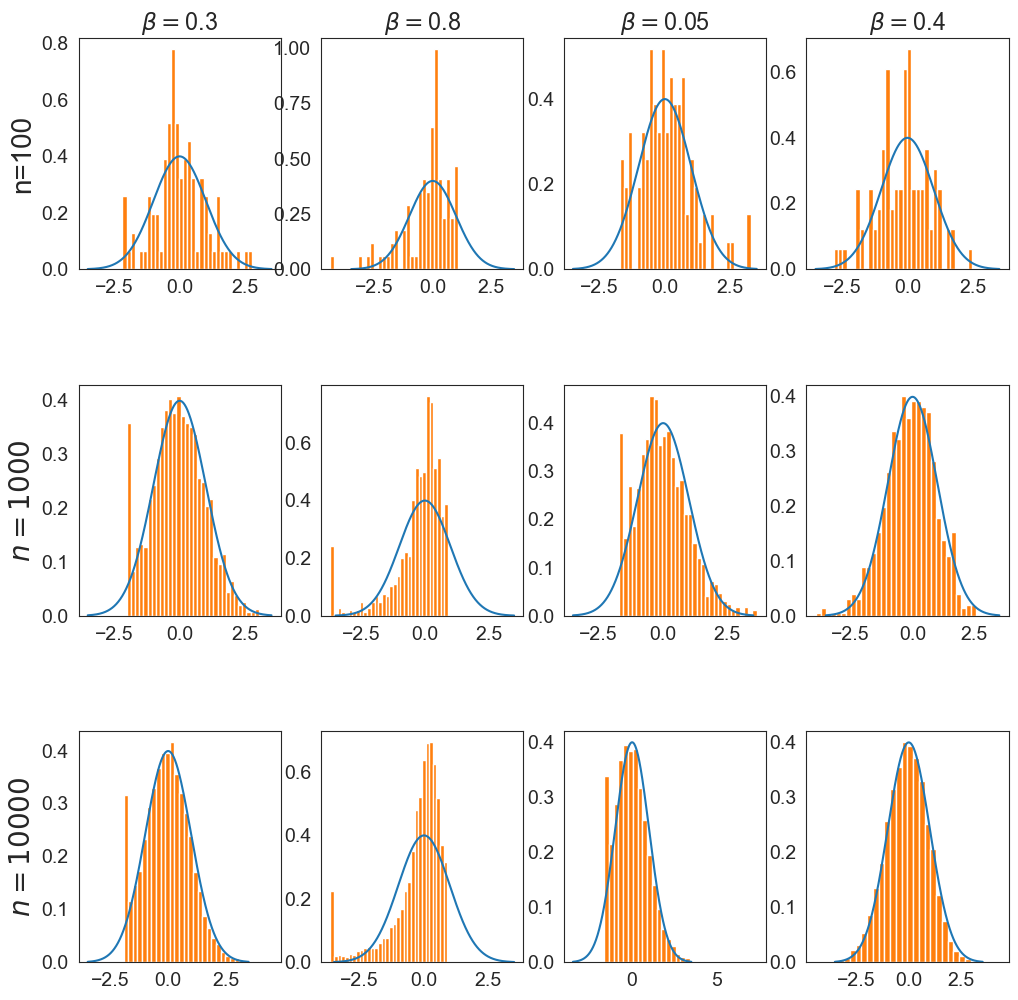

In [22]:
fig, axes = plt.subplots(3,4, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)
for i in range(3):
    for j in range(len(alpha)):
        axes[i,j].plot(x,f_eval)
        if i==0:
            axes[i,j].hist(param1[j]["beta1"],density=True,bins=32)
            axes[i, j].set_title(fr'$\beta=${beta[j]}')
            if j==0:
                axes[i, j].set_ylabel(fr'n=100', fontsize=20)
        elif i==1:
            axes[i,j].hist(param2[j]["beta1"],density=True,bins=32)
            if j==0:
                axes[i, j].set_ylabel(fr'$n=1000$', fontsize=20)
        else:
            axes[i,j].hist(param3[j]["beta1"],density=True,bins=32)
            if j==0:
                axes[i, j].set_ylabel(fr'$n=10000$', fontsize=20)

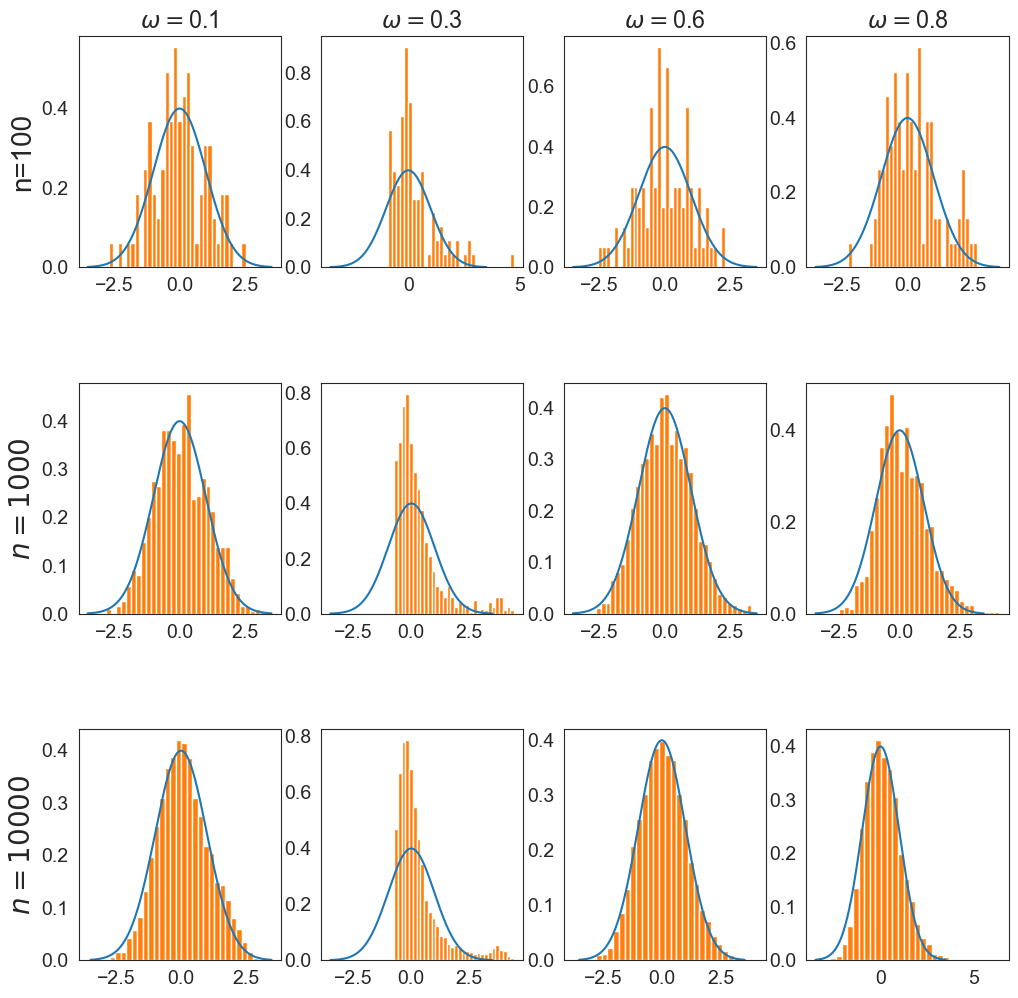

In [23]:
fig, axes = plt.subplots(3,4, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)
for i in range(3):
    for j in range(len(alpha)):
        axes[i,j].plot(x,f_eval)
        if i==0:
            axes[i,j].hist(param1[j]["omega"],density=True,bins=32)
            axes[i, j].set_title(fr'$\omega=${omega[j]}')
            if j==0:
                axes[i, j].set_ylabel(fr'n=100', fontsize=20)
        elif i==1:
            axes[i,j].hist(param2[j]["omega"],density=True,bins=32)
            if j==0:
                axes[i, j].set_ylabel(fr'$n=1000$', fontsize=20)
        else:
            axes[i,j].hist(param3[j]["omega"],density=True,bins=32)
            if j==0:
                axes[i, j].set_ylabel(fr'$n=10000$', fontsize=20)

# Ahora dejaremos n=1000 y subiremos el m de 100 a 10000

In [143]:
#parametros
alpha = [0.2,0.05,0.8,0.4]
beta = [0.3,0.8,0.05,0.4]
omega = [0.1,0.3,0.6,0.8]

#trayectoria(n) y cantidad de datos(m)
n = 1000
m = 100


In [144]:
param1 = []
for i in range(len(alpha)):
    result = sim_and_stim(n,m,alpha[i],beta[i],omega[i])
    param1.append(result)

In [145]:
m = 1000
param2 = []
for i in range(len(alpha)):
    result = sim_and_stim(n,m,alpha[i],beta[i],omega[i])
    param2.append(result)

In [146]:
m = 10000
param3 = []
for i in range(len(alpha)):
    result = sim_and_stim(n,m,alpha[i],beta[i],omega[i])
    param3.append(result)

# "Estandarizado"

In [147]:
for i in range(len(alpha)):
    param1[i]["alpha1"] = (param1[i]["alpha1"]-alpha[i])/(np.std(param1[i]["alpha1"]))
    param1[i]["beta1"] = (param1[i]["beta1"]-beta[i])/(np.std(param1[i]["beta1"]))
    param1[i]["omega"] = (param1[i]["omega"]-omega[i])/(np.std(param1[i]["omega"]))

In [148]:
for i in range(len(alpha)):
    param2[i]["alpha1"] = (param2[i]["alpha1"]-alpha[i])/(np.std(param2[i]["alpha1"]))
    param2[i]["beta1"] = (param2[i]["beta1"]-beta[i])/(np.std(param2[i]["beta1"]))
    param2[i]["omega"] = (param2[i]["omega"]-omega[i])/(np.std(param2[i]["omega"]))

In [149]:
for i in range(len(alpha)):
    param3[i]["alpha1"] = (param3[i]["alpha1"]-alpha[i])/(np.std(param3[i]["alpha1"]))
    param3[i]["beta1"] = (param3[i]["beta1"]-beta[i])/(np.std(param3[i]["beta1"]))
    param3[i]["omega"] = (param3[i]["omega"]-omega[i])/(np.std(param3[i]["omega"]))

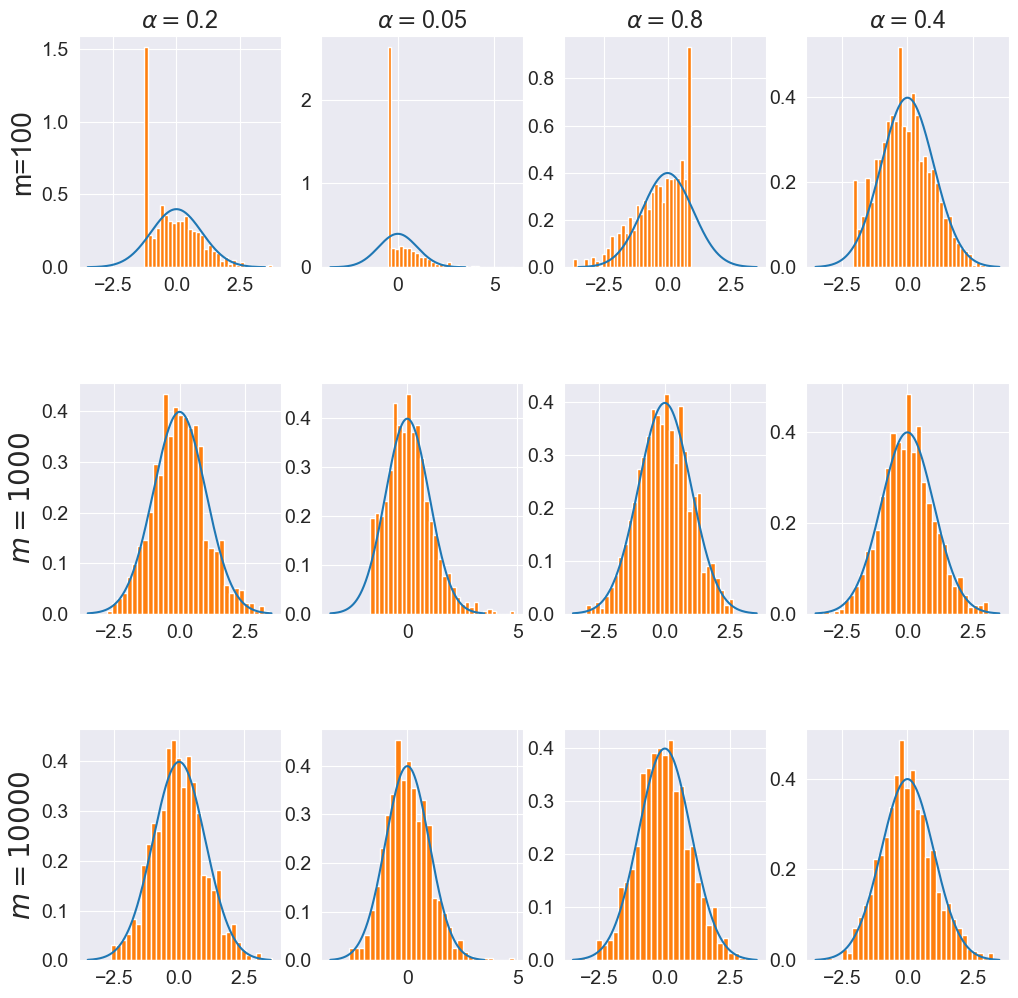

In [150]:
fig, axes = plt.subplots(3,4, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)
for i in range(3):
    for j in range(len(alpha)):
        axes[i,j].plot(x,f_eval)
        if i==0:
            axes[i,j].hist(param1[j]["alpha1"],density=True,bins=32)
            axes[i, j].set_title(fr'$\alpha=${alpha[j]}')
            if j==0:
                axes[i, j].set_ylabel(fr'm=100', fontsize=20)
        elif i==1:
            axes[i,j].hist(param2[j]["alpha1"],density=True,bins=32)
            if j==0:
                axes[i, j].set_ylabel(fr'$m=1000$', fontsize=20)
        else:
            axes[i,j].hist(param3[j]["alpha1"],density=True,bins=32)
            if j==0:
                axes[i, j].set_ylabel(fr'$m=10000$', fontsize=20)

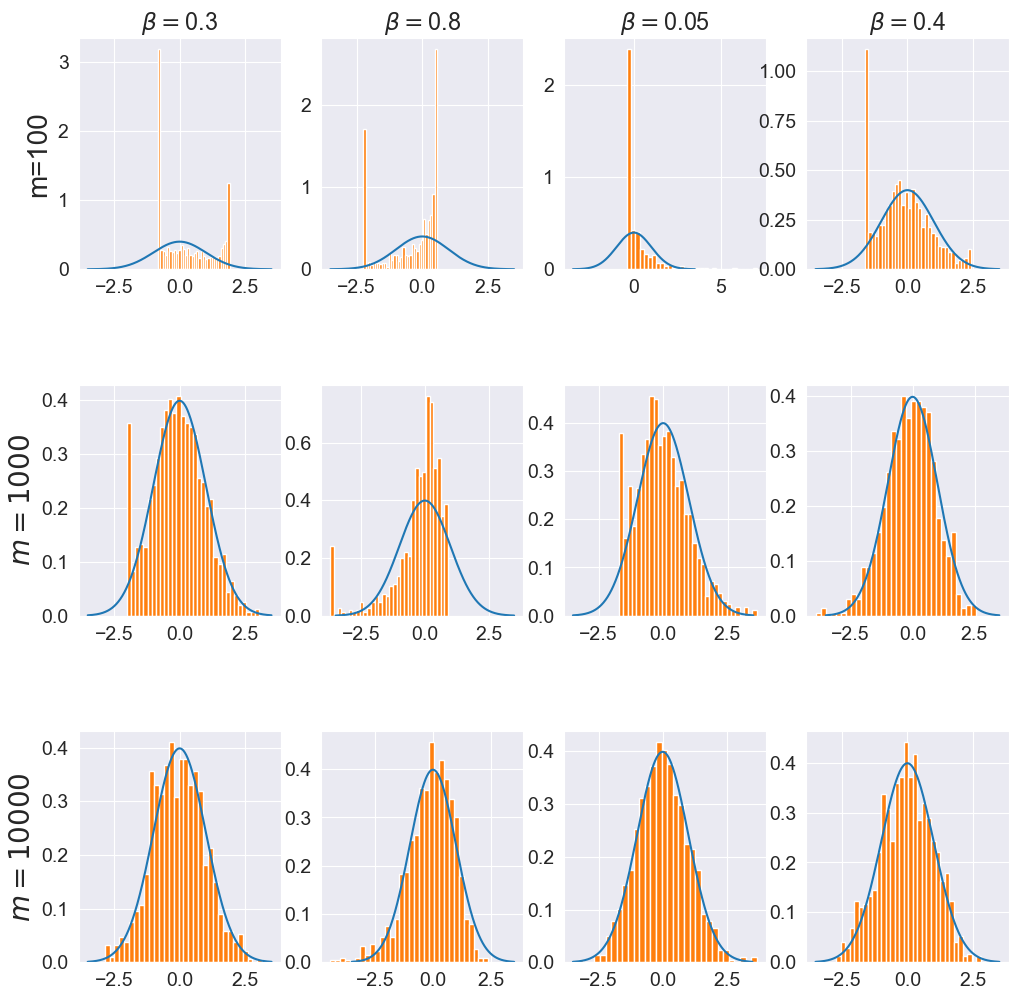

In [151]:
fig, axes = plt.subplots(3,4, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)
for i in range(3):
    for j in range(len(alpha)):
        axes[i,j].plot(x,f_eval)
        if i==0:
            axes[i,j].hist(param1[j]["beta1"],density=True,bins=32)
            axes[i, j].set_title(fr'$\beta=${beta[j]}')
            if j==0:
                axes[i, j].set_ylabel(fr'm=100', fontsize=20)
        elif i==1:
            axes[i,j].hist(param2[j]["beta1"],density=True,bins=32)
            if j==0:
                axes[i, j].set_ylabel(fr'$m=1000$', fontsize=20)
        else:
            axes[i,j].hist(param3[j]["beta1"],density=True,bins=32)
            if j==0:
                axes[i, j].set_ylabel(fr'$m=10000$', fontsize=20)

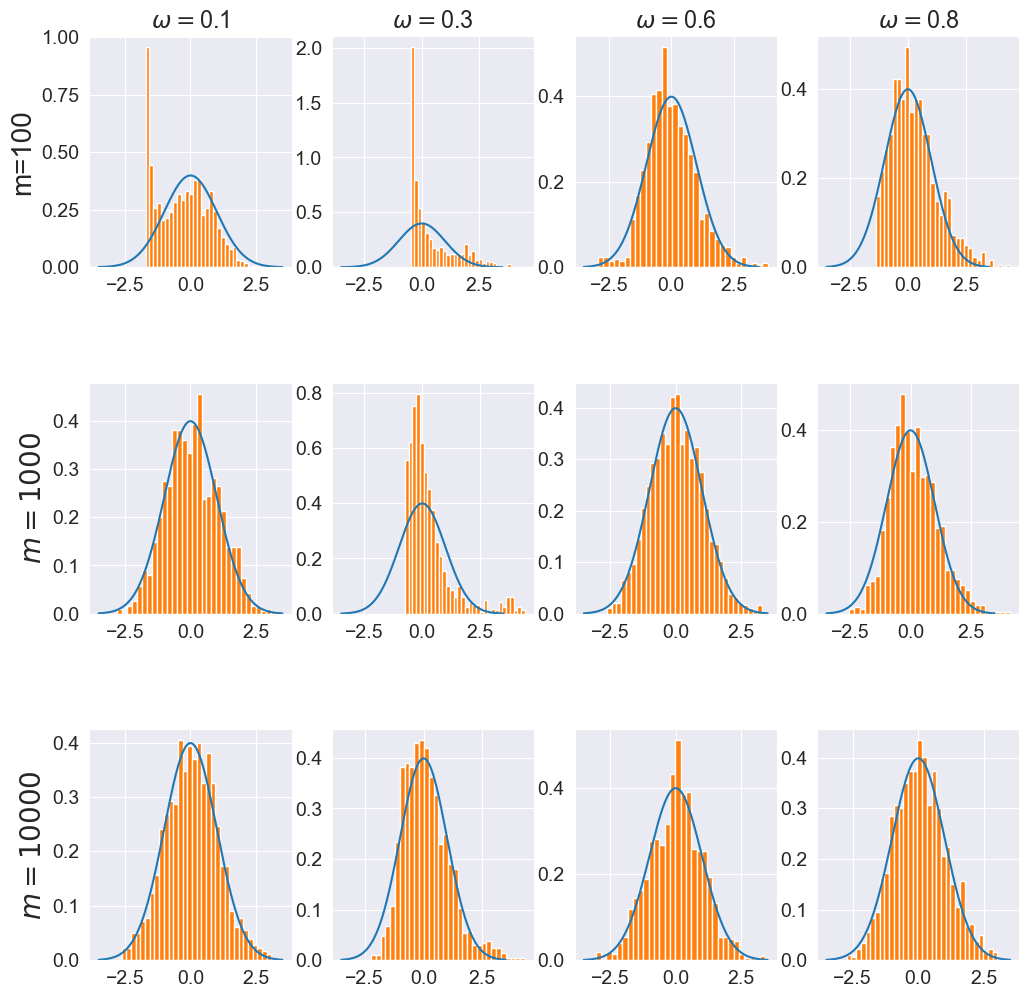

In [152]:
fig, axes = plt.subplots(3,4, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)
for i in range(3):
    for j in range(len(alpha)):
        axes[i,j].plot(x,f_eval)
        if i==0:
            axes[i,j].hist(param1[j]["omega"],density=True,bins=32)
            axes[i, j].set_title(fr'$\omega=${omega[j]}')
            if j==0:
                axes[i, j].set_ylabel(fr'm=100', fontsize=20)
        elif i==1:
            axes[i,j].hist(param2[j]["omega"],density=True,bins=32)
            if j==0:
                axes[i, j].set_ylabel(fr'$m=1000$', fontsize=20)
        else:
            axes[i,j].hist(param3[j]["omega"],density=True,bins=32)
            if j==0:
                axes[i, j].set_ylabel(fr'$m=10000$', fontsize=20)

# Dejaremos en m en 10000 y n en 10000(se me demora mucho)

In [115]:
m = 10000

In [116]:
n = 10000
param = []
for i in range(len(alpha)):
    result = sim_and_stim(n,m,alpha[i],beta[i],omega[i])
    param.append(result)

In [117]:
for i in range(len(alpha)):
    param[i]["alpha1"] = (param[i]["alpha1"]-alpha[i])/(np.std(param[i]["alpha1"]))
    param[i]["beta1"] = (param[i]["beta1"]-beta[i])/(np.std(param[i]["beta1"]))
    param[i]["omega"] = (param[i]["omega"]-omega[i])/(np.std(param[i]["omega"]))

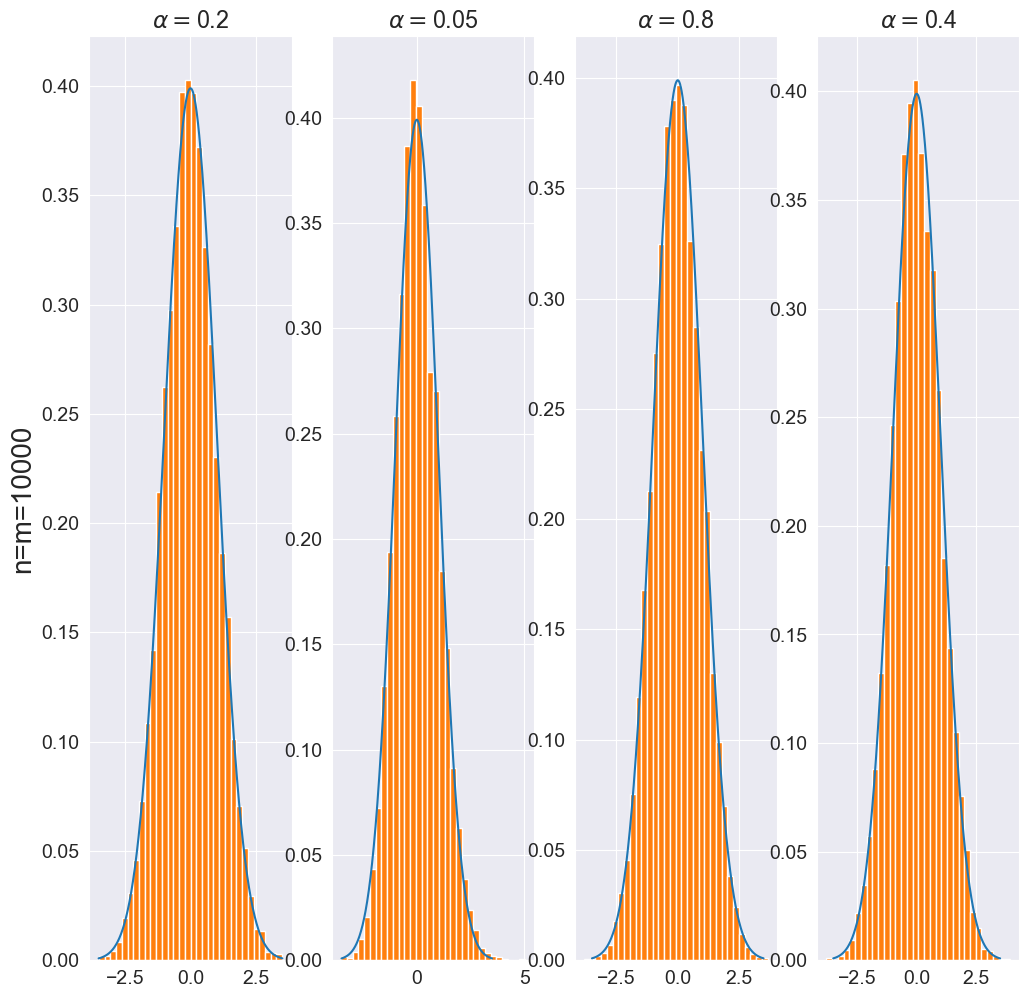

In [125]:
fig, axes = plt.subplots(1,4, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)

for j in range(len(alpha)):
    axes[j].plot(x,f_eval)
    if i==0:
        axes[j].hist(param[j]["alpha1"],density=True,bins=32)
        axes[j].set_title(fr'$\alpha=${alpha[j]}')
        if j==0:
            axes[j].set_ylabel(fr'n=m=10000', fontsize=20)

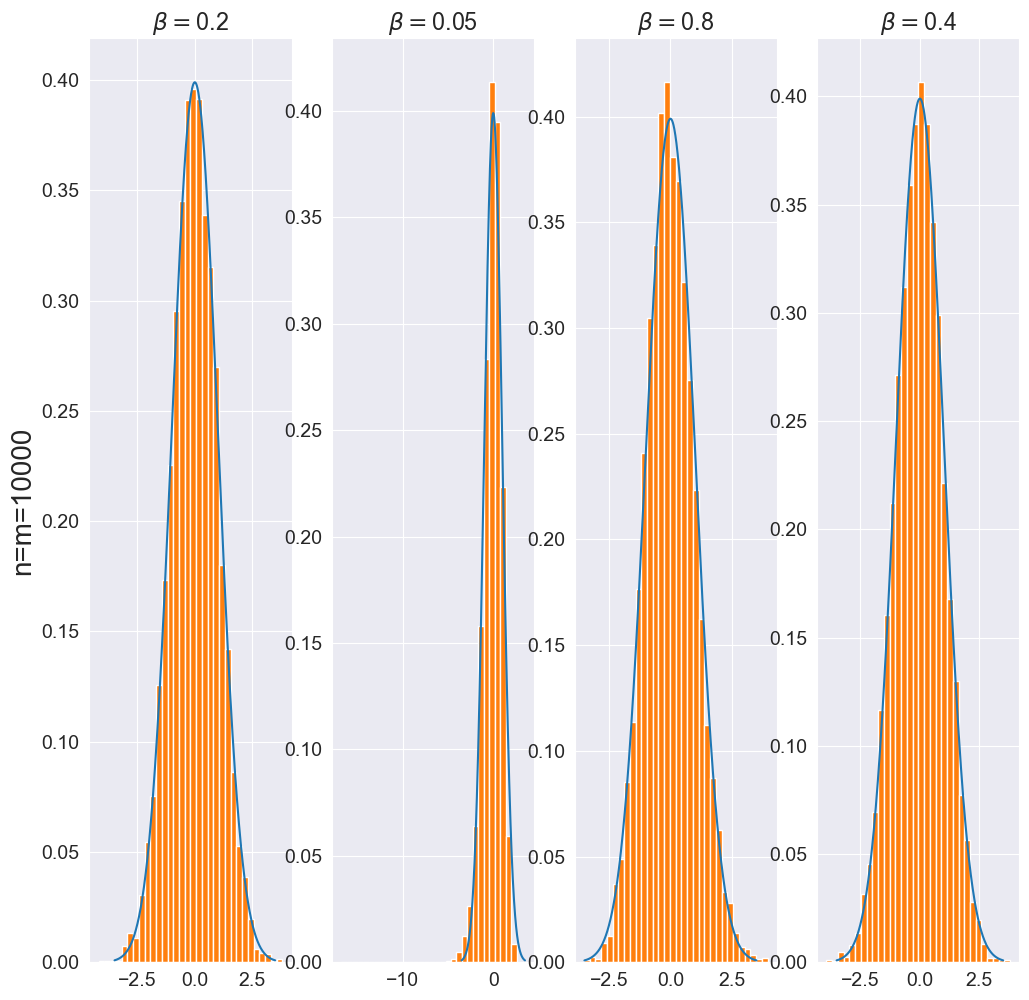

In [126]:
fig, axes = plt.subplots(1,4, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)

for j in range(len(alpha)):
    axes[j].plot(x,f_eval)
    if i==0:
        axes[j].hist(param[j]["beta1"],density=True,bins=32)
        axes[j].set_title(fr'$\beta=${beta[j]}')
        if j==0:
            axes[j].set_ylabel(fr'n=m=10000', fontsize=20)

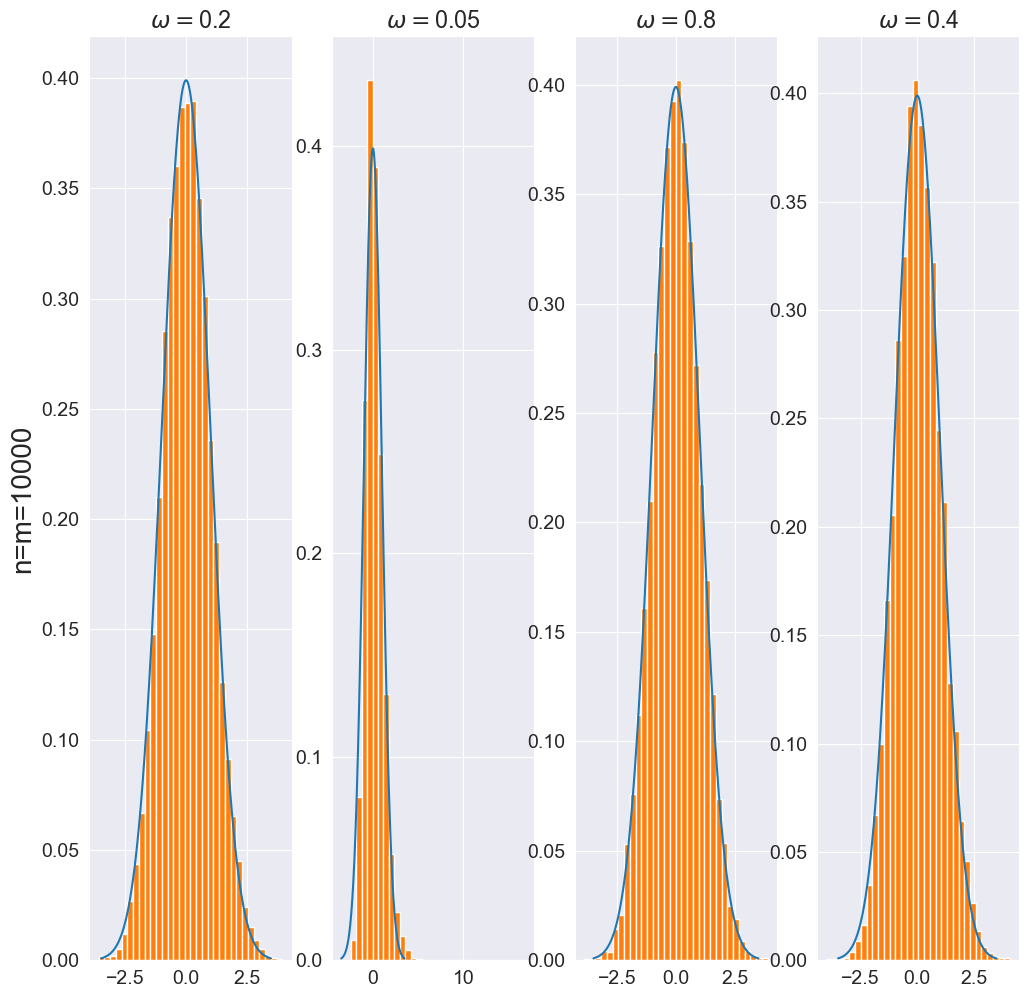

In [127]:
fig, axes = plt.subplots(1,4, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)

for j in range(len(alpha)):
    axes[j].plot(x,f_eval)
    if i==0:
        axes[j].hist(param[j]["omega"],density=True,bins=32)
        axes[j].set_title(fr'$\omega=${omega[j]}')
        if j==0:
            axes[j].set_ylabel(fr'n=m=10000', fontsize=20)

# ----------------PLOTS VIEJOS-----------------

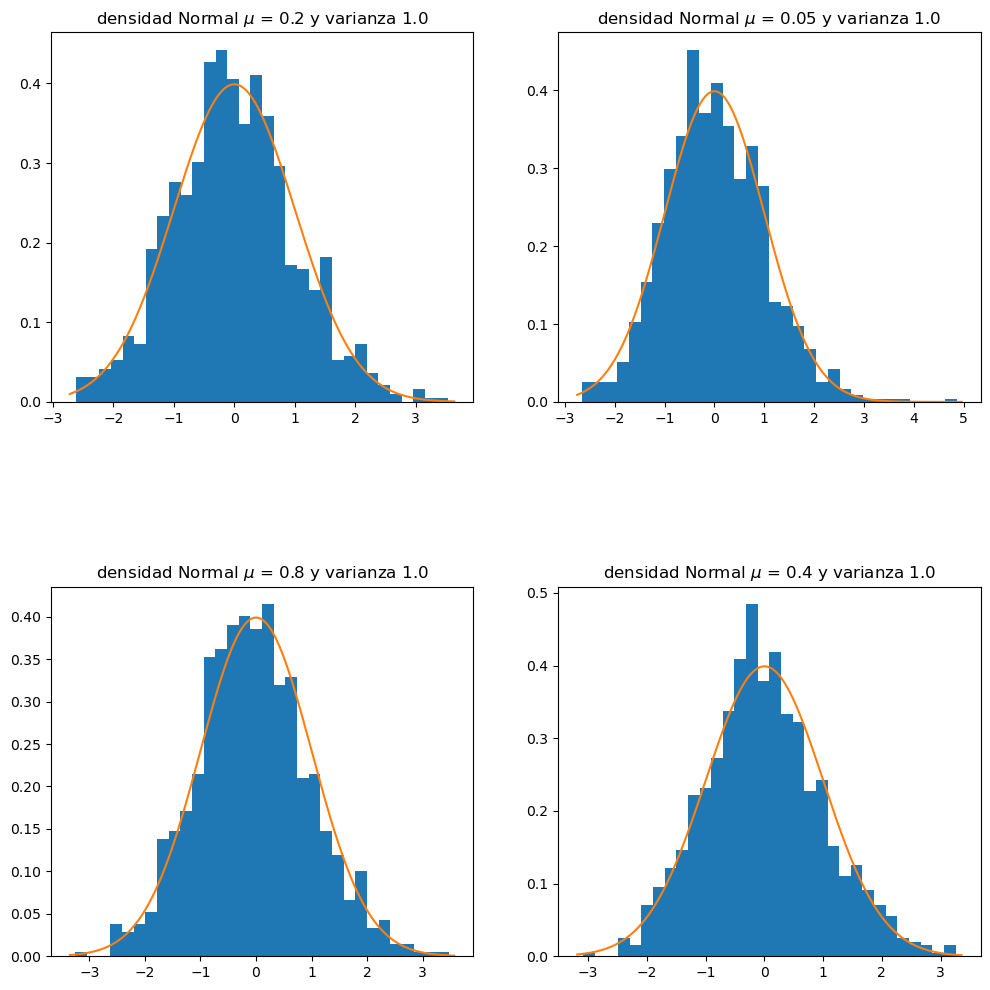

In [68]:
fig, axes = plt.subplots(2,2, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.hist(param[i]["alpha1"],bins=32,density=True);
    f_normal = lambda x : np.exp(-(x)**2/(2*np.var(param[i]["alpha1"])))/np.sqrt(2*np.pi*np.var(param[i]["alpha1"]))
    x = np.linspace(min(param[i]["alpha1"])-0.1, max(param[i]["alpha1"])+0.1, 1000)
    ax.plot(x,f_normal(x))
    ax.set_title(fr'$\alpha$ = {alpha[i]}')
    var = round(np.var(param[i]["alpha1"]),3)
    ax.set_title(fr'densidad Normal $\mu$ = {alpha[i]} y varianza {var}')
    i = i+1

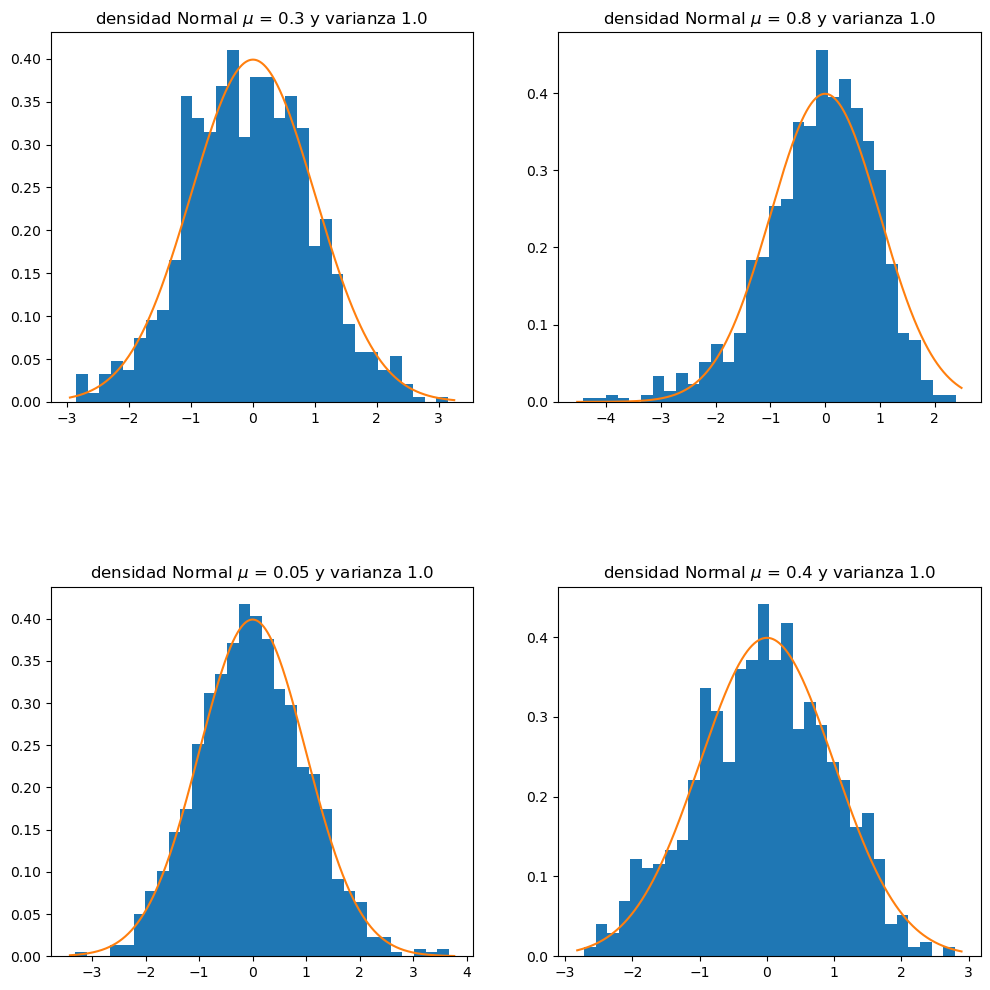

In [69]:
fig, axes = plt.subplots(2,2, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.hist(param[i]["beta1"],bins=32,density=True);
    f_normal = lambda x : np.exp(-(x)**2/(2*np.var(param[i]["beta1"])))/np.sqrt(2*np.pi*np.var(param[i]["beta1"]))
    x = np.linspace(min(param[i]["beta1"])-0.1, max(param[i]["beta1"])+0.1, 1000)
    ax.plot(x,f_normal(x))
    ax.set_title(fr'$\beta$ = {beta[i]}')
    var = round(np.var(param[i]["beta1"]),3)
    ax.set_title(fr'densidad Normal $\mu$ = {beta[i]} y varianza {var}')
    i = i+1

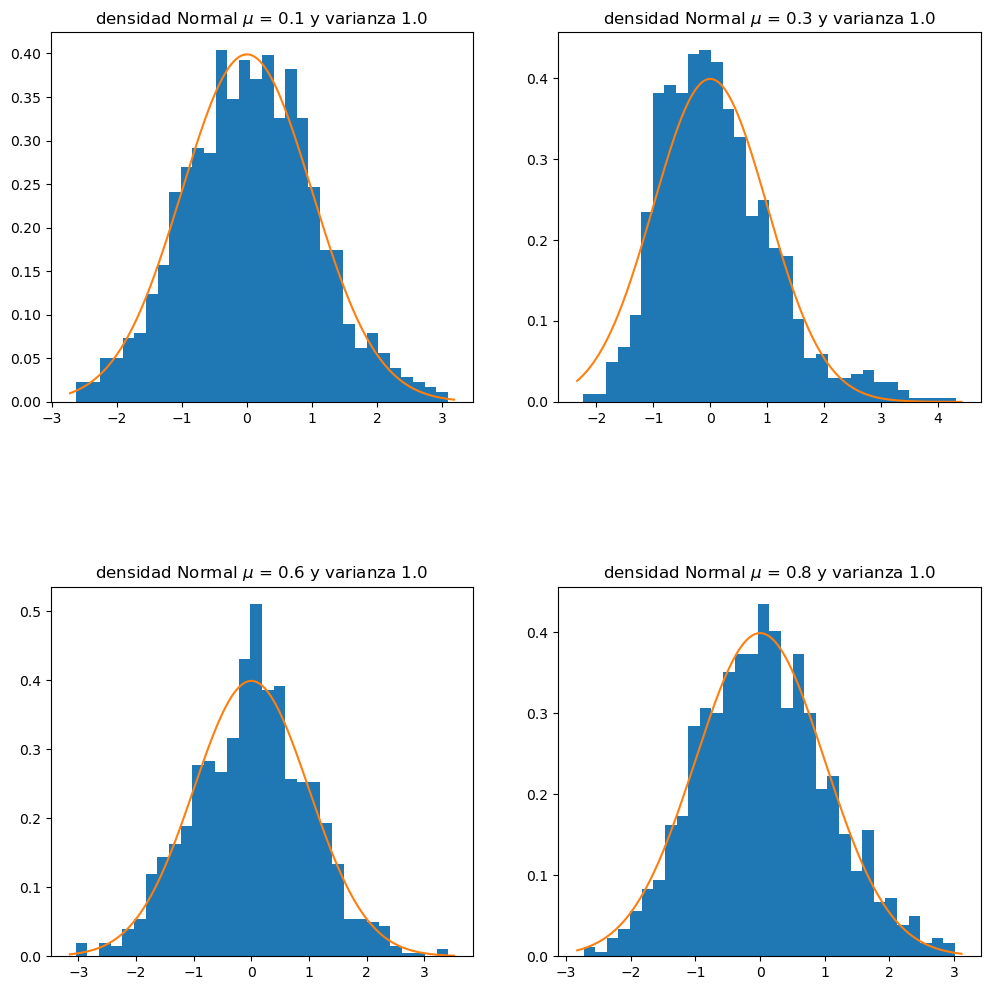

In [70]:
fig, axes = plt.subplots(2,2, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.hist(param[i]["omega"],bins=32,density=True);
    f_normal = lambda x : np.exp(-(x)**2/(2*np.var(param[i]["omega"])))/np.sqrt(2*np.pi*np.var(param[i]["omega"]))
    x = np.linspace(min(param[i]["omega"])-0.1, max(param[i]["omega"])+0.1, 1000)
    ax.plot(x,f_normal(x))
    ax.set_title(fr'$\omega$ = {omega[i]}')
    var = round(np.var(param[i]["omega"]),3)
    ax.set_title(fr'densidad Normal $\mu$ = {omega[i]} y varianza {var}')
    i = i+1